**NANDHINI.M**
**Data analyst intern assignment**

Import the required libraries and load the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/asbl_data_analyst_interview_assignment_netflix.xlsx')
df

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2018,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,"Children & Family Movies, Comedies"


Perform EDA

In [ ]:
df.head()

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          8807 non-null   object
 1   Title         8807 non-null   object
 2   Director      6173 non-null   object
 3   Cast          7982 non-null   object
 4   Country       7976 non-null   object
 5   Release_year  8807 non-null   int64 
 6   Genres        8807 non-null   object
dtypes: int64(1), object(6)
memory usage: 481.8+ KB


In [ ]:
print(df.shape)

(8807, 7)


In [ ]:
print(df.dtypes)

Type            object
Title           object
Director        object
Cast            object
Country         object
Release_year     int64
Genres          object
dtype: object


In [ ]:
print(df.describe())

       Release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [ ]:
print(df.isnull().sum())

Type               0
Title              0
Director        2634
Cast             825
Country          831
Release_year       0
Genres             0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


Plotting


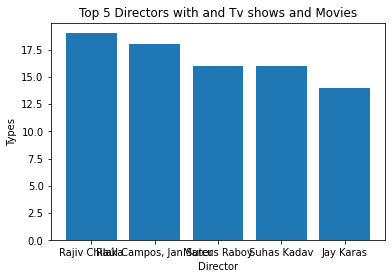

In [ ]:
director_counts = df['Director'].value_counts().head(5)
plt.bar(director_counts.index, director_counts.values)
plt.title('Top 5 Directors with and Tv shows and Movies')
plt.xlabel('Director')
plt.ylabel('Types')
plt.show()

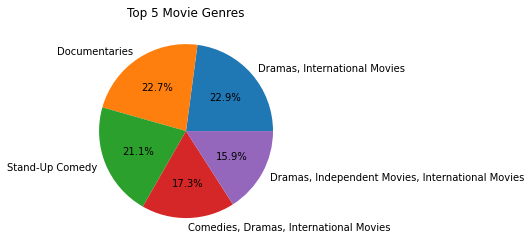

In [ ]:
movie_genres = df[df['Type'] == 'Movie']['Genres'].value_counts().head(5)
plt.pie(movie_genres.values, labels=movie_genres.index, autopct='%1.1f%%')
plt.title('Top 5 Movie Genres')
plt.show()

Question: 4A Which are the top 5 directors who produce most of the movies only?

In [ ]:
top_directors = df['Director'].value_counts().head(5)
print(top_directors)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: Director, dtype: int64


4B  Which are the top 5 genres which are liked by people or here liking means listed on the portal of Netflix (you can find a count for each genre and list the top 5 genres) for movies and TV shows?

In [ ]:
top_movie_genres = df[df['Type'] == 'Movie']['Genres'].value_counts().head(5)
print(top_movie_genres)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: Genres, dtype: int64


4C Which 2 directors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]


In [ ]:
print(df.columns)

Index(['Type', 'Title', 'Director', 'Cast', 'Country', 'Release_year',
       'Genres'],
      dtype='object')


In [ ]:
# create a new dataframe with the relevant columns
directors_df = df[['Director', 'Release_year']]
# group the dataframe by director and year, and count the number of movies/TV shows
director_year_counts = directors_df.groupby(['Director', 'Release_year']).size().reset_index(name='Count')

# calculate the change in movie/TV counts from the first year to the last year for each director
director_change = director_year_counts.groupby('Director')['Count'].apply(lambda x: x.iloc[-1] / x.iloc[0]).reset_index(name='Change')

# sort the directors by the change in movie/TV counts
top_directors = director_change.sort_values('Change', ascending=False).head(2)

# print the top 2 directors
print(f"The two directors that Netflix should collaborate with more based on the increase in their movies/TV shows over the past years are {top_directors.iloc[0]['Director']} and {top_directors.iloc[1]['Director']}.")


The two directors that Netflix should collaborate with more based on the increase in their movies/TV shows over the past years are Hidenori Inoue and Matt Askem.


4D  Which are the top 10 actors who are liked by people and have the most content on the Netflix OTT platform.

In [ ]:
actors_df = df.explode('Cast')
actors_df

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2018,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,"Children & Family Movies, Comedies"


In [ ]:
actor_counts = actors_df.groupby('Cast').size().reset_index(name='Count')
top_10_actors = actor_counts.sort_values('Count', ascending=False).head(10)


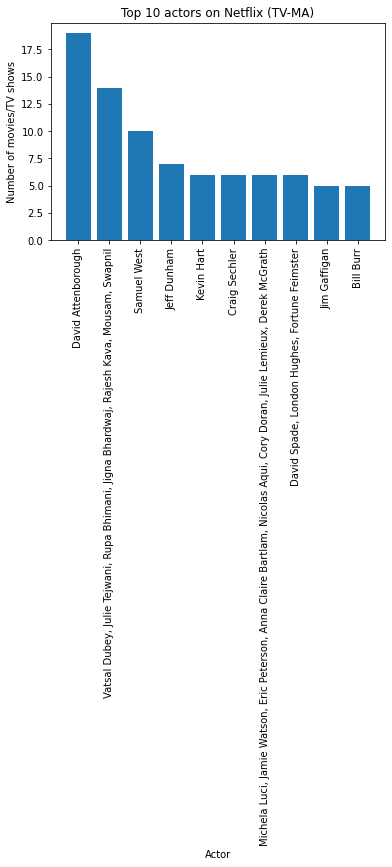

In [ ]:
plt.bar(top_10_actors['Cast'], top_10_actors['Count'])
plt.xticks(rotation=90)
plt.xlabel('Actor')
plt.ylabel('Number of movies/TV shows')
plt.title('Top 10 actors on Netflix (TV-MA)')
plt.show()


4E Which 2 actors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]

In [ ]:
# Filter to only include movies and TV shows

df = df[(df['Type'] == 'Movie') | (df['Type'] == 'TV Show')]

# Group the actors by their name and count the number of movies/TV shows they have appeared in each year
actor_year_counts = df.explode('Cast').groupby(['Cast', 'Release_year']).size().reset_index(name='Count')

# Sort the actors by their appearance count in the most recent year (i.e., 2021) in descending order
top_actors_2021 = actor_year_counts[actor_year_counts['Release_year'] == 2021].sort_values('Count', ascending=False)['Cast'].head(10)


In [ ]:
# Filter the DataFrame to only include the top actors in 2021
df['Cast'] = df['Cast'].fillna('')
df_top_actors_2021 = df[df['Cast'].str.contains('|'.join(top_actors_2021))]

# Group the top actors by their name and count the number of movies/TV shows they have appeared in each year
top_actor_year_counts = df_top_actors_2021.explode('Cast').groupby(['Cast', 'Release_year']).size().reset_index(name='Count')

# Create a pivot table to summarize the number of movies/TV shows each actor has appeared in each year
pivot_table = top_actor_year_counts.pivot(index='Release_year', columns='Cast', values='Count')


In [ ]:
pivot_table

Cast,,"'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Odenike Odetola, Funmi Eko, Keppy Ekpenyong","4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, INFINITE, KARA, Shinee, Sistar, VIXX, Nine Muses, BTS, Secret, Topp Dogg","50 Cent, Ryan Phillippe, Bruce Willis, Rory Markham, Jenna Dewan, Brett Granstaff, Randy Couture, Susie Abromeit, Ron Turner, James Remar","A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasciore, Jake Johnson, Lauren Lapkus, Zachary Levi, BD Wong, David Gunning",A.R. Rahman,"Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kishore, Sapthagiri","Aadil Khan, Sadia Khateeb, Zain Khan Durrani, Priyanshu Chatterjee, Bhavna Chauhan, Ashwin Dhar, Farid Azad Khan, Saghar Sehrai","Aaditi Pohankar, Vijay Varma, Vishwas Kini, Kishore Kumar G., Shivani Rangole, Suhita Thatte, Sandeep Dhabale, Saqib Ayub","Aakarshan Singh, Vikramjeet Virk, Reena Aggarwal, Khalid Siddiqui, Abigail Jain, Rishabh Jain",...,"Çağlar Çorumlu, Büşra Pekin, Ersin Korkut, Gülhan Tekin, Mahir İpek, Uğur Bilgin, Öner Ateş, Hakan Ummak, Patrycja Widlak, Hamza Yazıcı","Çetin Tekindor, Fikret Kuşkan, Hümeyra, Ege Tanman, Şerif Sezer, Yetkin Dikinciler, Binnur Kaya, Mahmut Gökgöz, Nergis Çorakçi, Bilge Sen","Öykü Karayel, Fatih Artman, Funda Eryiğit, Defne Kayalar, Settar Tanrıöğen, Tülin Özen, Alican Yücesoy, Bige Önal","Úrsula Corberó, Itziar Ituño, Álvaro Morte, Paco Tous, Enrique Arce, Pedro Alonso, María Pedraza, Alba Flores, Miguel Herrán, Jaime Lorente, Esther Acebo, Darko Peric, Kiti Mánver","Úrsula Corberó, Álvaro Cervantes, Najwa Nimri, Patricia López Arnaiz, Daniel Grao, Joaquín Furriel, Maria Molins, Emilio Gutiérrez Caba, Luisa Gavasa, José María Pou, Ángela Molina","İbrahim Büyükak, Zeynep Koçak, Gupse Özay, Cengiz Bozkurt","İbrahim Çelikkol, Belçim Bilgin, Alican Yücesoy, Teoman Kumbaracıbaşı, Serdar Yeğin, Tülay Günal, Gözde Cığacı, Ferit Aktuğ, Rojda Demirer, Aybars Kartal Özson","Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre Karayel, Duygu Yetiş, Onur Buldu, Salih Kalyon, Bilge Şen, Nilgün Belgün, Hakan Akın","Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başak Parlak, Mahir Günşiray, Hakan Boyav, Hakan Gerçek, Berrak Kuş, Gamze Süner Atay, Mehmet Esen","Ṣọpẹ́ Dìrísù, Wunmi Mosaku, Matt Smith, Malaika Wakoli-Abigaba"
Release_year,,,,,,,,,,,,,,,,,,,,,
1925,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1942,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1944,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,120.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,121.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
2019,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
